In [1]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./models/')
from useful_functions import df_to_dict, concat_dico, get_classement, sort_list


In [2]:
models1Dnames=['Moving Average','ARIMA', 'Exponential', 'Linear Regression', 'Bayesian Regression','SIRH1', 'SIRH2', 'SIRH3', 'SIRH4']
models3Dnames=[ 'VAR', 'Exponential Multi', 'SIRH Multi1', 'SIRH Multi2','SEIR Mob']
list_of_models= models1Dnames+models3Dnames
threshold=10

In [3]:
#Calculate distribution of ranks for RMSE 14-days
model_type='1D'
loss='RMSE'
reach='14'
#type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']
label_point='all'

#df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )
all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
results_list=[ name for name in os.listdir('./results/global_evaluation/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
for name in results_list :
    mob=int(name.split('_')[-5])
    pand=int(name.split('_')[-4])
    #dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation/'+name))
    #dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation/'+name.replace('1D', '3D')))
    with open('./results/global_evaluation/'+name, 'r') as f:
        dicoresults1 = json.load(f)
    with open('./results/global_evaluation/'+name.replace('1D', '3D'), 'r') as f:
        dicoresults2 = json.load(f)
    
    dicoresults=concat_dico(dicoresults1, dicoresults2)
    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized = np.array(df.loc['n_hospitalized'])
    r_eff=np.array(df.loc['r_eff'])
    indexs_points=[[20*i] for i in range(1, 15) ] 
    prediction=pd.read_csv('./results/predictions_of_the_models/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.index=[20*i for i in range(1, 15)]
    #prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
    prediction_all=prediction
    #prediction=prediction_bis
    for point in indexs_points: 
        if n_hospitalized[point[0]] >= threshold :
            real_value=prediction_all['Real values'].loc[point[0]]
            perfs=dicoresults[str(point)]
            #assert(len(perfs)==14)
            #assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
            #perfs.pop(11) # remove the moving average multi
            #assert(len(perfs)==13)
            rankings=get_classement(perfs)
            for i in range(len(rankings)): 
                rank_model_i=rankings[i]
                all_ranks[i][rank_model_i]+=1
expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]   
expected_ranks_14=expected_ranks.copy()

In [4]:
#Calculate rankings for WIS 14-days
model_type='1D'
loss='WIS'
reach='14'
#type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']
label_point='all'

all_ranks_w=np.zeros((len(list_of_models), len(list_of_models)))
results_list=[ name for name in os.listdir('./results/global_evaluation/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
for name in results_list :
    mob=int(name.split('_')[-5])
    pand=int(name.split('_')[-4])
    #dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
    #dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
    with open('./results/global_evaluation/'+name, 'r') as f:
        dicoresults1 = json.load(f)
    with open('./results/global_evaluation/'+name.replace('1D', '3D'), 'r') as f:
        dicoresults2 = json.load(f)
    
    dicoresults=concat_dico(dicoresults1, dicoresults2)
    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized = np.array(df.loc['n_hospitalized'])
    r_eff=np.array(df.loc['r_eff'])
    indexs_points=[[20*i] for i in range(1, 15) ] 
    prediction=pd.read_csv('./results/predictions_of_the_models/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.index=[20*i for i in range(1, 15)]
    #prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
    prediction_all=prediction
    #prediction=prediction_bis
    for point in indexs_points: 
        if n_hospitalized[point[0]] >= threshold :
            real_value=prediction_all['Real values'].loc[point[0]]
            perfs=dicoresults[str(point)]
            #assert(len(perfs)==14)
            #assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
            #perfs.pop(11) # remove the moving average multi
            #assert(len(perfs)==13)
            rankings=get_classement(perfs)
            for i in range(len(rankings)): 
                rank_model_i=rankings[i]
                all_ranks_w[i][rank_model_i]+=1
expected_ranks_w=[np.sum((np.array(all_ranks_w[i])/np.sum(np.array(all_ranks_w[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]
expected_ranks_w_14=expected_ranks_w.copy()

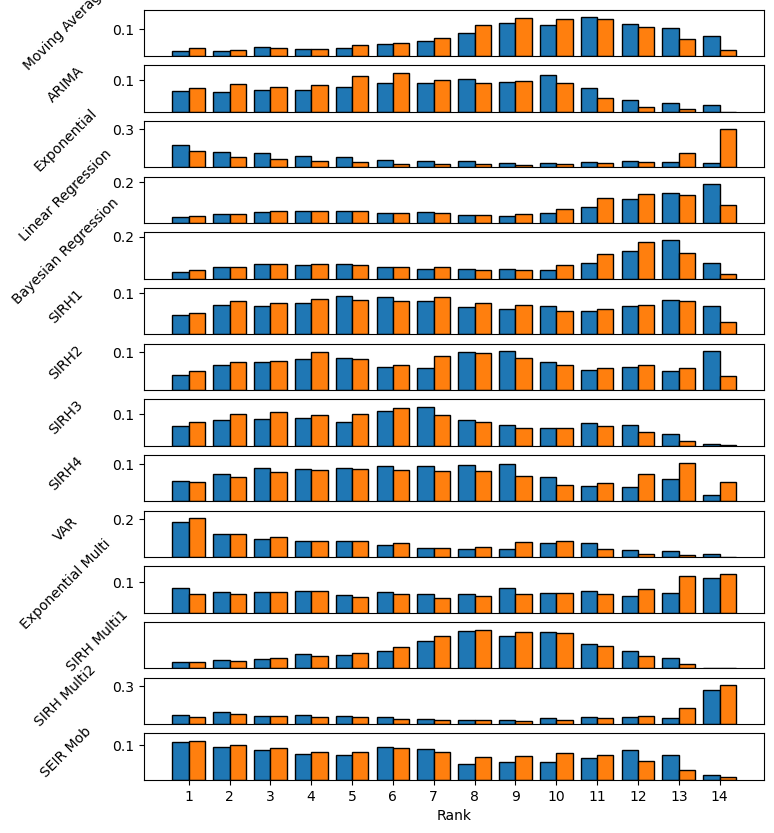

In [5]:
#Visualise rankings
fig, axs = plt.subplots(len(list_of_models), figsize=(8, 10))     
 
for i in range(len(rankings)):   
    axs[i].bar([j+1-0.2 for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.4)
    axs[i].bar([j+1+0.2 for j in range(len(rankings))], np.array(all_ranks_w[i])/np.sum(np.array(all_ranks_w[i])), edgecolor='black', width = 0.4)

    if np.max(all_ranks[i])>np.max(all_ranks_w[i]):
        axs[i].set_yticks([round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
        axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
    else:
        axs[i].set_yticks([round(np.max(np.array(all_ranks_w[i])/np.sum(np.array(all_ranks_w[i]))), 1) ])
        axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks_w[i])/np.sum(np.array(all_ranks_w[i]))))*1.2)
    
    axs[i].set_ylabel(list_of_models[i], labelpad=30)
    axs[i].yaxis.label.set_rotation(45)
    if i != len(rankings)-1:
        axs[i].set_xticks([])
    else : 
        axs[i].set_xticks([j+1 for j in range(len(rankings))])
        axs[i].set_xlabel('Rank'  )
    #fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
fig.savefig('rankings.pdf',bbox_inches='tight',pad_inches=1.8)


In [6]:
order_rmse = [x for _,x in sorted(zip(expected_ranks,list_of_models))]
order_wis = [x for _,x in sorted(zip(expected_ranks_w,list_of_models))]
print(order_rmse)
print(order_wis)
print(list_of_models)
print(expected_ranks)
print(expected_ranks_w)

['Exponential', 'VAR', 'SEIR Mob', 'SIRH3', 'SIRH4', 'ARIMA', 'SIRH1', 'Exponential Multi', 'SIRH2', 'SIRH Multi1', 'SIRH Multi2', 'Bayesian Regression', 'Linear Regression', 'Moving Average']
['VAR', 'SIRH3', 'ARIMA', 'SEIR Mob', 'SIRH2', 'SIRH1', 'SIRH4', 'SIRH Multi1', 'Exponential Multi', 'Bayesian Regression', 'Exponential', 'Moving Average', 'Linear Regression', 'SIRH Multi2']
['Moving Average', 'ARIMA', 'Exponential', 'Linear Regression', 'Bayesian Regression', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'VAR', 'Exponential Multi', 'SIRH Multi1', 'SIRH Multi2', 'SEIR Mob']
[8.500431158378845, 6.000574877838459, 4.5734406438631785, 8.407588387467664, 7.707962058062662, 6.52112676056338, 6.726070709974131, 5.635240011497556, 5.751365334866341, 4.575740155217017, 6.673469387755102, 7.001149755676918, 7.343776947398679, 5.565679793043978]
[7.830698476573728, 5.068410462776659, 7.624892210405289, 8.010922678930728, 7.3411899971256105, 6.160390916930153, 6.125898246622594, 4.931589537223341, 

In [7]:
#Calculate distribution of ranks for RMSE 7-days
model_type='1D'
loss='RMSE'
reach='7'
#type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']
label_point='all'

#df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )
all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
results_list=[ name for name in os.listdir('./results/global_evaluation/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
for name in results_list :
    mob=int(name.split('_')[-5])
    pand=int(name.split('_')[-4])
    #dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation/'+name))
    #dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation/'+name.replace('1D', '3D')))
    with open('./results/global_evaluation/'+name, 'r') as f:
        dicoresults1 = json.load(f)
    with open('./results/global_evaluation/'+name.replace('1D', '3D'), 'r') as f:
        dicoresults2 = json.load(f)
    
    dicoresults=concat_dico(dicoresults1, dicoresults2)
    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized = np.array(df.loc['n_hospitalized'])
    r_eff=np.array(df.loc['r_eff'])
    indexs_points=[[20*i] for i in range(1, 15) ] 
    prediction=pd.read_csv('./results/predictions_of_the_models/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.index=[20*i for i in range(1, 15)]
    #prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
    prediction_all=prediction
    #prediction=prediction_bis
    for point in indexs_points: 
        if n_hospitalized[point[0]] >= threshold :
            real_value=prediction_all['Real values'].loc[point[0]]
            perfs=dicoresults[str(point)]
            #assert(len(perfs)==14)
            #assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
            #perfs.pop(11) # remove the moving average multi
            #assert(len(perfs)==13)
            rankings=get_classement(perfs)
            for i in range(len(rankings)): 
                rank_model_i=rankings[i]
                all_ranks[i][rank_model_i]+=1
expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]   
expected_ranks_7=expected_ranks.copy()

In [8]:
#Calculate rankings for WIS 7-days
model_type='1D'
loss='WIS'
reach='7'
#type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']
label_point='all'

all_ranks_w=np.zeros((len(list_of_models), len(list_of_models)))
results_list=[ name for name in os.listdir('./results/global_evaluation/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
for name in results_list :
    mob=int(name.split('_')[-5])
    pand=int(name.split('_')[-4])
    #dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
    #dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
    with open('./results/global_evaluation/'+name, 'r') as f:
        dicoresults1 = json.load(f)
    with open('./results/global_evaluation/'+name.replace('1D', '3D'), 'r') as f:
        dicoresults2 = json.load(f)
    
    dicoresults=concat_dico(dicoresults1, dicoresults2)
    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized = np.array(df.loc['n_hospitalized'])
    r_eff=np.array(df.loc['r_eff'])
    indexs_points=[[20*i] for i in range(1, 15) ] 
    prediction=pd.read_csv('./results/predictions_of_the_models/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.index=[20*i for i in range(1, 15)]
    #prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
    prediction_all=prediction
    #prediction=prediction_bis
    for point in indexs_points: 
        if n_hospitalized[point[0]] >= threshold :
            real_value=prediction_all['Real values'].loc[point[0]]
            perfs=dicoresults[str(point)]
            #assert(len(perfs)==14)
            #assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
            #perfs.pop(11) # remove the moving average multi
            #assert(len(perfs)==13)
            rankings=get_classement(perfs)
            for i in range(len(rankings)): 
                rank_model_i=rankings[i]
                all_ranks_w[i][rank_model_i]+=1
expected_ranks_w=[np.sum((np.array(all_ranks_w[i])/np.sum(np.array(all_ranks_w[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]
expected_ranks_w_7=expected_ranks_w.copy()

In [15]:
data = {

    "Model": list_of_models,

    "RMSE (7 days)": np.array(expected_ranks_7)/len(list_of_models),

    "WIS (7 days)": np.array(expected_ranks_w_7)/len(list_of_models),

    "RMSE (14 days)": np.array(expected_ranks_14)/len(list_of_models),

    "WIS (14 days)": np.array(expected_ranks_w_14)/len(list_of_models)

}

df = pd.DataFrame(data)

df.iloc[:, 1:] = df.iloc[:, 1:].round(2) #best rank should be 1

# Convert the DataFrame to LaTeX table format

latex_table = df.to_latex(index=False, float_format="%.4f")



# Save the LaTeX table to a file for future use

output_path = "./model_ranking_table.tex"

with open(output_path, "w") as f:

    f.write(latex_table)
